In [46]:
# initial imports 
import pandas as pd
import datetime as dt

In [47]:
# importing the CSV 
mobility_data = pd.read_csv('2020_US_Region_Mobility_Report.csv', index_col = 'date', parse_dates = True, infer_datetime_format = True)

In [48]:
# seeing the data 
mobility_data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,
2020-02-15,US,United States,NaN,NaN,NaN,NaN,NaN,6.0,2.0,15.0,3.0,2.0,-1.0
2020-02-16,US,United States,NaN,NaN,NaN,NaN,NaN,7.0,1.0,16.0,2.0,0.0,-1.0
2020-02-17,US,United States,NaN,NaN,NaN,NaN,NaN,6.0,0.0,28.0,-9.0,-24.0,5.0
2020-02-18,US,United States,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,6.0,1.0,0.0,1.0
2020-02-19,US,United States,NaN,NaN,NaN,NaN,NaN,2.0,0.0,8.0,1.0,1.0,0.0


In [49]:
len(mobility_data)

879637

In [50]:
# replacing all empty sub-regions which represent the entire US with code 'ALL'
mobility_data['sub_region_1'].fillna(value ='ALL', inplace=True)

In [51]:
mobility_data.drop(columns=[
    'country_region_code',
    'metro_area','census_fips_code',
    'country_region_code',
    'transit_stations_percent_change_from_baseline',
    'iso_3166_2_code',
    'parks_percent_change_from_baseline',
    'residential_percent_change_from_baseline'], 
    inplace = True)

In [52]:
import numpy as np

In [53]:
nan_filter = mobility_data["sub_region_2"].isna()

In [54]:
mobility_data = mobility_data[nan_filter]


In [55]:
# resetting index
mobility_data.reset_index()

,date,country_region,sub_region_1,sub_region_2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline
0,2020-02-15,United States,ALL,NaN,6.0,2.0,2.0
1,2020-02-16,United States,ALL,NaN,7.0,1.0,0.0
2,2020-02-17,United States,ALL,NaN,6.0,0.0,-24.0
3,2020-02-18,United States,ALL,NaN,0.0,-1.0,0.0
4,2020-02-19,United States,ALL,NaN,2.0,0.0,1.0
...,...,...,...,...,...,...,...
18039,2021-01-22,United States,Wyoming,NaN,-22.0,-11.0,-12.0
18040,2021-01-23,United States,Wyoming,NaN,-26.0,-15.0,-12.0
18041,2021-01-24,United States,Wyoming,NaN,-22.0,-18.0,-13.0
18042,2021-01-25,United States,Wyoming,NaN,-19.0,-10.0,-17.0


In [61]:
# Renaming columns 
mobility_data = mobility_data.rename(
    columns ={
    'retail_and_recreation_percent_change_from_baseline':'Retail and Recreation',
    'grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'sub_region_1':'State'}) 

In [62]:
#seeing the data 
mobility_data

,country_region,State,sub_region_2,Retail and Recreation,Grocery and Pharmacy,Workplaces
date,,,,,,
2020-02-15,United States,ALL,NaN,6.0,2.0,2.0
2020-02-16,United States,ALL,NaN,7.0,1.0,0.0
2020-02-17,United States,ALL,NaN,6.0,0.0,-24.0
2020-02-18,United States,ALL,NaN,0.0,-1.0,0.0
2020-02-19,United States,ALL,NaN,2.0,0.0,1.0
...,...,...,...,...,...,...
2021-01-22,United States,Wyoming,NaN,-22.0,-11.0,-12.0
2021-01-23,United States,Wyoming,NaN,-26.0,-15.0,-12.0
2021-01-24,United States,Wyoming,NaN,-22.0,-18.0,-13.0


In [63]:
import hvplot.pandas 

In [64]:
mobility_data.hvplot.line(x ='date', y ='Retail and Recreation', groupby ='State')

:DynamicMap   [State]
   :Curve   [date]   (Retail and Recreation)

<AxesSubplot:title={'center':'Average Percent Change of Travel for Retail and Recreation'}, xlabel='State'>

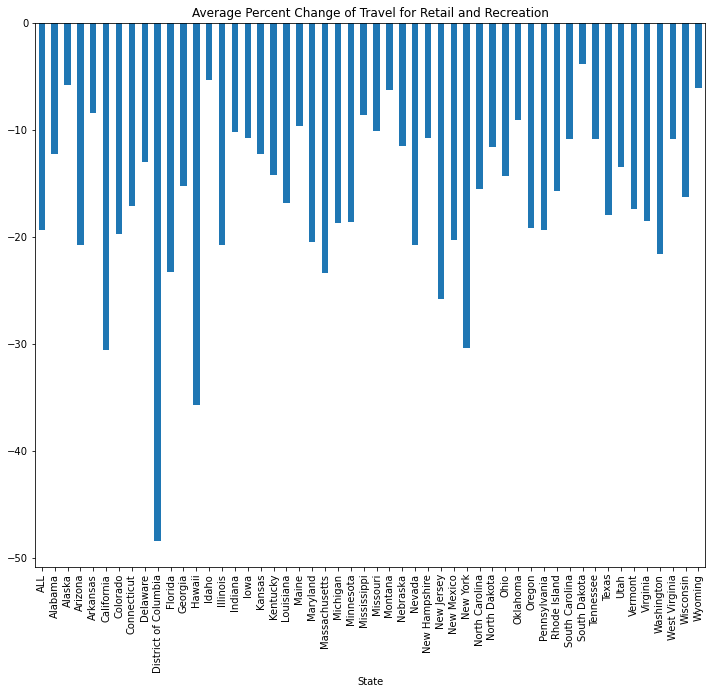

In [135]:
mobility_mean = mobility_data.groupby("State")['Retail and Recreation'].mean()
mobility_mean.plot(
    kind='bar', 
    figsize = (12,10), 
    title= 'Average Percent Change of Travel for Retail and Recreation'
    )

In [69]:
## bringing in the Long&Lat 
coordinates = pd.read_csv('coordinates.csv')
# seeing the data 
coordinates.head()

,latitude,longitude,State
0,63.588753,-154.493062,Alaska
1,32.318231,-86.902298,Alabama
2,35.201050,-91.831833,Arkansas
3,34.048928,-111.093731,Arizona
4,36.778261,-119.417932,California


In [70]:
# merging the two dataframes 

merged = pd.merge(mobility_data,coordinates)

In [72]:
#looking at the data 
merged

,country_region,State,sub_region_2,Retail and Recreation,Grocery and Pharmacy,Workplaces,latitude,longitude
0,United States,Alabama,NaN,5.0,2.0,2.0,32.318231,-86.902298
1,United States,Alabama,NaN,0.0,-2.0,-1.0,32.318231,-86.902298
2,United States,Alabama,NaN,3.0,0.0,-17.0,32.318231,-86.902298
3,United States,Alabama,NaN,-4.0,-3.0,1.0,32.318231,-86.902298
4,United States,Alabama,NaN,4.0,1.0,1.0,32.318231,-86.902298
...,...,...,...,...,...,...,...,...
17692,United States,Wyoming,NaN,-22.0,-11.0,-12.0,43.075968,-107.290284
17693,United States,Wyoming,NaN,-26.0,-15.0,-12.0,43.075968,-107.290284
17694,United States,Wyoming,NaN,-22.0,-18.0,-13.0,43.075968,-107.290284
17695,United States,Wyoming,NaN,-19.0,-10.0,-17.0,43.075968,-107.290284


In [77]:
## getting the average percent change 
state_mean=merged.groupby(['State']).mean()

In [79]:
state_mean

,Retail and Recreation,Grocery and Pharmacy,Workplaces,latitude,longitude
State,,,,,
Alabama,-12.207493,-0.438040,-23.734870,32.318231,-86.902298
Alaska,-5.755043,2.729107,-23.048991,63.588753,-154.493062
Arizona,-20.746398,-9.048991,-31.348703,34.048928,-111.093731
Arkansas,-8.420749,1.925072,-22.780980,35.201050,-91.831833
California,-30.538905,-9.400576,-34.636888,36.778261,-119.417932
Colorado,-19.731988,-4.077810,-31.775216,39.550051,-105.782067
Connecticut,-17.138329,-7.008646,-29.991354,41.603221,-73.087749
Delaware,-12.994236,-3.567723,-28.582133,38.910832,-75.527670
District of Columbia,-48.412104,-21.596542,-47.587896,38.905985,-77.033418


In [85]:
# trying a mapbox plot 
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import plotly.express as px
import os

In [86]:
load_dotenv()

True

In [89]:
map_box_api = os.getenv("mapbox")
# setting mapbox key 
px.set_mapbox_access_token(map_box_api)